# East African News Classification

## Business Understanding

### Business Overview

> The "East African News Classification" dataset presents an opportunity for news organizations in the region to automate and improve the accuracy of news categorization. Analyzing the dataset enables identification of emerging trends and provides valuable insights into East African news.


### Business Problem

* News outlets have been grappling with the time-consuming and error-prone manual process of categorizing news articles from East African nations. This inefficient approach hinders their ability to track media streams, understand cultural influences on press reporting, and provide tailored insights. 
* By implementing a machine learning text classification model, the news outlet can automate and improve the accuracy of categorization, enabling them to efficiently track information flows, identify emerging trends, and gain valuable insights into how culture shapes press reporting in the region. 
* This investment in a robust text classification model would streamline operations, ensure consistency, and enhance their reporting capabilities, ultimately allowing them to better serve their audience and remain competitive.


## Data Understanding

* For this project, we analysed an East African News Classification dataset which has 23268 rows 3 columns.
* The three columns are {text}, {label} and {category}
* We chose this Dataset because it offers critical insights into media streams across East Africa, allowing for tailored insights related to racial tensions and social shifts.




## Objectives

### General Objectives

 - Ensure consistency and accuracy in news categorization.
 - Streamline the news outlet's operations by implementing a robust text classification model.
 - Improve the ability to track information flows in East African media streams.
 - Provide valuable insights into the impact of cultural factors on press reporting.
 - Better serve the news outlet's audience by delivering relevant and timely news content.




### Specific Objectives

 - To develop a machine learning model that can accurately classify East African news articles into relevant categories or topics.
 - To provide a user-friendly application that integrates with existing news platforms or search engines, enabling easy adoption and integration for news organizations and content providers.
 - To enhance the news consumption experience for readers by providing personalized and tailored access to relevant news articles.


### Success Metrics

 - The overall metric used for this project is accuracy, to measure the correctly classified instances. Benchmark is 75%.


## Data Preparation

## Modeling

## Evaluation

## Deployment

## Importing Necessary Libraries

Let's start by importing the relevant libraries

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer

import nltk
import re
import string
from bs4 import BeautifulSoup
import requests

<ipython-input-1-03b16aecabf9>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\githi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
!pip install python==3.11.4

ERROR: Could not find a version that satisfies the requirement python==3.11.4 (from versions: none)
ERROR: No matching distribution found for python==3.11.4


In [2]:
# Checking the first five rows of the dataset
df = pd.read_csv('data/train_v0.2.csv')
df.head()

,text,label
0,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi
1,"PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...",kitaifa
2,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi
3,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo
4,Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...,kitaifa


In [3]:
# Checking the first five rows of the dataset
scraped_data = pd.read_csv('data/scraped_data.csv')
scraped_data.head()

,text,label
0,WAPENZI wa sanaa na burudani Mlima Kenya na ko...,burudani
1,ISHU ya Stivo Simple Boy na The Sailors imenia...,burudani
2,MWIMBAJI Esther Akoth almaarufu Akothee amelal...,burudani
3,MWANABAHARI Betty Kyalo ameshikilia kuwa bado ...,burudani
4,MWANAMUZIKI Richell Bonner almaarufu Richie Sp...,burudani


In [4]:
df = pd.concat([df,scraped_data],axis=0)

In [5]:
#profile = ProfileReport(df)


In [6]:
#profile.to_widgets()

# Data Cleaning

## Missing Values

Let's check for missing values


In [7]:
# Function to check for missing values
def check_missing_values(data):
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Missing values found:")
        print(missing_values)
    else:
        print("No missing values found.")

# Check for
check_missing_values(df)

Missing values found:
text     1
label    0
dtype: int64


Here we found missing values so we shall drop them

In [8]:
# Drop row with missing value
df.dropna(axis=0, inplace=True)

# Confirm missing rows dropped
check_missing_values(df)

No missing values found.


## Duplicate Values

Let's check for duplicates in the  dataset

In [9]:
# Function to check for duplicates
def check_duplicates(df):
    duplicates = df.duplicated()
    if duplicates.any():
        print("Duplicate rows found:")
        print(df[duplicates])
    else:
        print("No duplicate rows found.")

check_duplicates(df)

Duplicate rows found:
                                                 text label
39  \n[email protected]\nMdalasini\nMDALASINI ni k...  afya


Lets transform the data to lowercase

In [10]:
# Transform text to lowercase
df["text"] = df["text"].str.lower()
df.head()

,text,label
0,"bodi ya utalii tanzania (ttb) imesema, itafan...",uchumi
1,"pendo fundisha-mbeya rais dk. john magufuri, ...",kitaifa
2,mwandishi wetu -singida benki ya nmb imetoa ms...,uchumi
3,"timu ya taifa ya tanzania, serengeti boys jan...",michezo
4,na agatha charles – dar es salaam aliyekuwa k...,kitaifa


## Clean the text data by removing special characters, digits, and converting to lowercase

Our dataset had alot of special characters and digits so we need to remove them and clean the data

In [11]:
# Clean the text data by removing special characters, digits, and converting to lowercase
df['cleaned_text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x.lower())
df.head(1)

,text,label,cleaned_text
0,"bodi ya utalii tanzania (ttb) imesema, itafan...",uchumi,bodi ya utalii tanzania ttb imesema itafan...


## Removing emojis

Our dataset also had alot of emojis which we also removed

In [12]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # Chinese/Japanese/Korean characters
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010FFFF"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)
    cleaned_text = emoji_pattern.sub(r'', text)
    return cleaned_text

In [13]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_emojis(x))
df.tail()

,text,label,cleaned_text
212,uhakika wa kupata malisho ni mojawapo ya chang...,uchumi,uhakika wa kupata malisho ni mojawapo ya chang...
213,ukiingia katika shamba la ololo eneo la kajiad...,uchumi,ukiingia katika shamba la ololo eneo la kajiad...
214,shamba la charles mburu ni bustani ya mseto wa...,uchumi,shamba la charles mburu ni bustani ya mseto wa...
215,"wakati hafanyi kazi na naivaa, chapa ya mitind...",uchumi,wakati hafanyi kazi na naivaa chapa ya mitind...
216,baada ya kusaka ajira kwa muda mrefu pasi na m...,uchumi,baada ya kusaka ajira kwa muda mrefu pasi na m...


Our dataset now has no more emojis

## Removing stopwords

We made a custom stopwords list for identifying the stopwords to be removed from the dataset

In [14]:
# sample text before removing stopwords
df['cleaned_text'][0]

0     bodi ya utalii tanzania  ttb  imesema  itafan...
0    wapenzi wa sanaa na burudani mlima kenya na ko...
Name: cleaned_text, dtype: object

We defined a function to remove the stopwords that have been identified in the list and further checked to confirm that they have been removed

In [15]:
# defining stopwords list
stopwords_swahili = ['akasema', 'alikuwa', 'alisema', 'baada', 'basi','bila', 'cha', 'chini', 'hadi', 'hapo', 'hata','hivyo', 'hiyo', 'huku', 'huo', 'ili',
'ilikuwa', 'juu', 'kama', 'karibu', 'katika', 'kila ', 'kima', 'kisha', 'kubwa', 'kutoka', 'kuwa', 'kwa', 'kwamba', 'kwenda', 'kwenye', 'la', 'lakini', 'mara',
'mdogo', 'mimi', 'mkubwa', 'mmoja', 'moja', 'muda', 'mwenye', 'na', 'naye', 'ndani', 'ng', 'ni', 'nini', 'pamoja', 'pia', 'sana', 'sasa', 'sauti', 'tafadhali', 'tena',
'tu', 'ule', 'vile', 'wa', 'wakati', 'wake', 'walikuwa', 'wao', 'watu', 'wengine', 'wote', 'ya', 'yake', 'yangu', 'yao', 'yeye', 'yule', 'za', 'zaidi', 'zake', 'vya']

In [16]:
# function to remove stopwords
def swahili_stops(text):
    no_stops = " ".join([word for word in text.split() if word not in stopwords_swahili])
    return no_stops

In [17]:
# confirming stopwords removal
df['cleaned_text'] = df['cleaned_text'].apply(lambda text : swahili_stops(text))
df['cleaned_text'][0]

0    bodi utalii tanzania ttb imesema itafanya misa...
0    wapenzi sanaa burudani mlima kenya kote nchini...
Name: cleaned_text, dtype: object

This confirms that there are no more stopwords

## Removing punctuations

Our dataset also had alot of punctuations so we had to remove them. But first let's see what kind of punctuations we had in our dataset

In [18]:
# punctuation
exclude = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
# remove punctuations
def remove_punctuations(text):
    
    for char in exclude:
        text = text.replace(char,'')
    return text

In [20]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_punctuations)
df.head()

,text,label,cleaned_text
0,"bodi ya utalii tanzania (ttb) imesema, itafan...",uchumi,bodi utalii tanzania ttb imesema itafanya misa...
1,"pendo fundisha-mbeya rais dk. john magufuri, ...",kitaifa,pendo fundisha mbeya rais dk john magufuri ame...
2,mwandishi wetu -singida benki ya nmb imetoa ms...,uchumi,mwandishi wetu singida benki nmb imetoa msaada...
3,"timu ya taifa ya tanzania, serengeti boys jan...",michezo,timu taifa tanzania serengeti boys jana ilijiw...
4,na agatha charles – dar es salaam aliyekuwa k...,kitaifa,agatha charles dar es salaam aliyekuwa katibu ...



This shows the data with punctuations before removing them and what the dataset looks like without the punctuations on the right

## Tokenization

Here we shall Tokenize our data. This will help us with organizing and understanding  the text data, and also enabling further analysis and processing.

In [21]:
df['tokenized_text'] = df['cleaned_text'].apply(lambda x: word_tokenize(x))
df.head()

,text,label,cleaned_text,tokenized_text
0,"bodi ya utalii tanzania (ttb) imesema, itafan...",uchumi,bodi utalii tanzania ttb imesema itafanya misa...,"[bodi, utalii, tanzania, ttb, imesema, itafany..."
1,"pendo fundisha-mbeya rais dk. john magufuri, ...",kitaifa,pendo fundisha mbeya rais dk john magufuri ame...,"[pendo, fundisha, mbeya, rais, dk, john, maguf..."
2,mwandishi wetu -singida benki ya nmb imetoa ms...,uchumi,mwandishi wetu singida benki nmb imetoa msaada...,"[mwandishi, wetu, singida, benki, nmb, imetoa,..."
3,"timu ya taifa ya tanzania, serengeti boys jan...",michezo,timu taifa tanzania serengeti boys jana ilijiw...,"[timu, taifa, tanzania, serengeti, boys, jana,..."
4,na agatha charles – dar es salaam aliyekuwa k...,kitaifa,agatha charles dar es salaam aliyekuwa katibu ...,"[agatha, charles, dar, es, salaam, aliyekuwa, ..."


## Exploratory Data Analysis: Frequency Distributions

Here it involves examining and understanding the characteristics and patterns within the dataset.ed how often a word appears in the dataset. Lets see what the top 10 most frequent words in our dataset

In [37]:
from nltk.probability import FreqDist
# Calculate word frequencies
freq_dist = FreqDist(df["tokenized_text"].explode())

# Print the most common words and their frequencies
for word, frequency in freq_dist.most_common(10):
    print(f"{word}: {frequency}")

mwaka: 29541
serikali: 24441
hilo: 21494
nchini: 20703
tanzania: 18220
mkuu: 18036
timu: 17386
nchi: 17188
rais: 17128
huyo: 16909


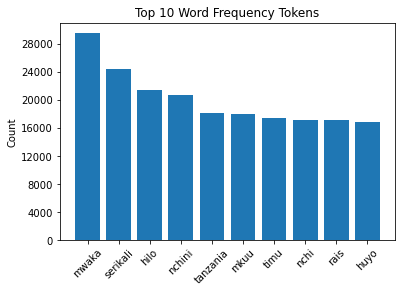

In [23]:
from matplotlib.ticker import MaxNLocator
def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=45)
    
visualize_top_10(freq_dist, "Top 10 Word Frequency Tokens")


Here we plotted the results to have a more visual view of the tokens

In [24]:
#lets check the Frequency of words in the label column
df['label'].value_counts()

kitaifa      10190
michezo       6005
burudani      2220
kimataifa     1888
uchumi        1306
afya           814
Name: label, dtype: int64

 - 'kitaifa' is the most frequent value in the 'label' column, appearing 10,155 times.
 - 'afya' is the least frequent value, appearing 779 times.

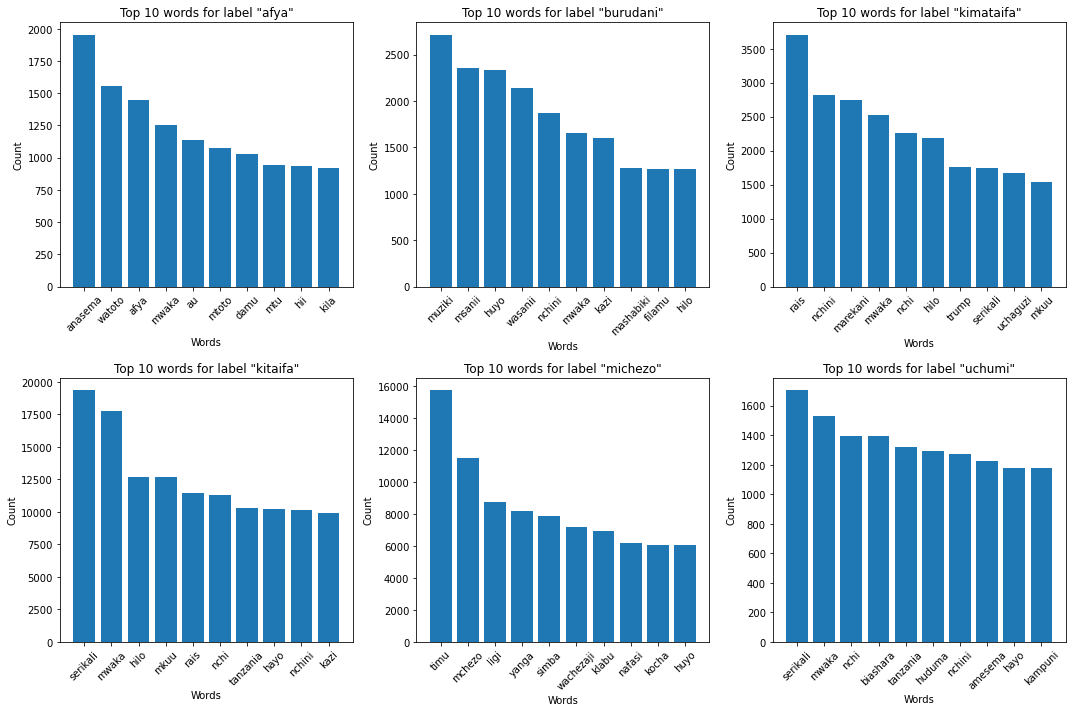

In [30]:
def plot_top_10_for_each_label(df, tokenized_column):
    # Group the data by labels
    grouped_data = df.groupby('label')[tokenized_column]
    # Create a figure with subplots for each label
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    # Iterate over the labels and plot the top 10 words by count
    for i, (label, tokens) in enumerate(grouped_data):
        # Flatten the list of strings
        flattened_tokens = [token for sublist in tokens for token in sublist]
        # Count the occurrences of each word
        word_counts = pd.Series(flattened_tokens).value_counts()
        top_10_words = word_counts.head(10)
        # Create a bar plot for the current label
        ax = axes[i // 3, i % 3]
        ax.bar(top_10_words.index, top_10_words.values)
        ax.set_title(f'Top 10 words for label "{label}"')
        ax.set_xlabel('Words')
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
    # Adjust the spacing between subplots
    plt.tight_layout()
    # Show the plots
    plt.show()
    
    
plot_top_10_for_each_label(df, 'tokenized_text')



Here we plotted the top frequent words per label:
- 'anasema' was the top value for the label 'afya'
- 'muziki' was the top value for the label 'burudani'
- 'rais' was the top value for the label 'kimataifa'
- 'serikali' was the top value for the label 'kitaifa'
- 'timu' was the top value for the label 'michezo'
- 'serikali' was the top value for the label 'uchumi'

## Baseline Model

TF-IDF (Term Frequency-Inverse Document Frequency) is another popular technique to vectorize text. It assigns weights to words based on their frequency in a document and their rarity in the entire corpus. Words that appear frequently in a document but rarely in other documents are considered more important. . It creates a matrix where each row represents a document, and each column represents a unique word in the entire corpus.

In [24]:
# Import the relevant vectorizer class
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df['tokenized_text'].tolist()

# Convert the list of tokenized text to a single string
corpus_string = [' '.join(tokens) for tokens in corpus]

# Instantiate a vectorizer with max_features=10
# (we are using the default token pattern)
tfidf = TfidfVectorizer(max_features=10)

# Fit the vectorizer on X_train["text"] and transform it
X = tfidf.fit_transform(corpus_string)

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X, columns=tfidf.get_feature_names_out())

,hilo,huyo,mkuu,mwaka,nchi,nchini,rais,serikali,tanzania,timu
0,0.000000,0.000000,0.000000,0.441999,0.0,0.726598,0.000000,0.000000,0.526015,0.000000
1,0.281420,0.000000,0.000000,0.000000,0.0,0.000000,0.742909,0.607363,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.239722,0.0,0.788154,0.000000,0.566874,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0,0.364383,0.000000,0.000000,0.791377,0.490863
4,0.542317,0.000000,0.377738,0.659944,0.0,0.180813,0.238607,0.195072,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
22418,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
22419,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
22420,0.000000,0.928036,0.000000,0.251073,0.0,0.275157,0.000000,0.000000,0.000000,0.000000
22421,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


fit and evaluate a multinomial Naive Bayes classifier using `cross_val_score` 

In [25]:
# Import relevant class and function
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Instantiate a MultinomialNB classifier
baseline_model = MultinomialNB()
baseline_model.fit(X, df['label'])

# Evaluate the classifier on X_train_vectorized and y_train
baseline_cv = cross_val_score(baseline_model, X, df['label'])
baseline_cv

array([0.64860647, 0.6490524 , 0.65239688, 0.6456289 , 0.65209634])

### get predictions

In [26]:
# Prepare the new text
new_text = "biashara"

# Vectorize the new text using the same vectorizer
new_text_vectorized = tfidf.transform([new_text])

# Make predictions using the trained model
predicted_class = baseline_model.predict(new_text_vectorized)

# Print the predicted class
print(predicted_class)

['kitaifa']


## Pickle

In [27]:
import joblib

with open('model.pkl', 'wb') as f:
    joblib.dump(baseline_model, f)

In [28]:
import joblib

with open('vectorizer.pkl', 'wb') as f:
    joblib.dump(tfidf, f)

### Creating Our Function

The serialized model is not sufficient on its own for the HTTP API server to know what to do. You also need to write the actual Python function for it to execute.

Let's write a function and test it out. In this case, let's say the function:

* takes in text
* returns a label

In [29]:
def news_classification(text):
    """
    Given sepal length, sepal width, petal length, and petal width,
    predict the class of iris
    """
    
    # Load the model from the file
    with open("model.pkl", "rb") as f:
        baseline_model = joblib.load(f)

    # Vectorize the new text using the same vectorizer
    new_text_vectorized = tfidf.transform([text])

    # Make predictions using the trained model
    predicted_label = baseline_model.predict(new_text_vectorized)
    
    return {"predicted_label": predicted_label}

Now let's test it out.

In [30]:
news_classification('TIMU ya soka ya arsenal ilinyorosha manchester united')

{'predicted_label': array(['michezo'], dtype='<U9')}

For Google Cloud Functions specifically, all of this code would need to be written in a file called `main.py`:

In [75]:
with open('main.py', 'w') as f:
    f.write('''import json
import joblib

def news_classification(text):
    """
    Given sepal length, sepal width, petal length, and petal width,
    predict the class of iris
    """
    
    # Load the model from the file
    with open("model.pkl", "rb") as f:
        baseline_model = joblib.load(f)

    # Vectorize the new text using the same vectorizer
    new_text_vectorized = tfidf.transform([text])

    # Make predictions using the trained model
    predicted_label = baseline_model.predict(new_text_vectorized)
    
    return {"predicted_label": predicted_label}

def predict(request):
    """
    `request` is an HTTP request object that will automatically be passed
    in by Google Cloud Functions
    
    You can find all of its properties and methods here:
    https://flask.palletsprojects.com/en/1.0.x/api/#flask.Request
    """
    
    # Get the request data from the user in JSON format
    request_json = request.get_json()
    
    # Send it to our prediction function using ** to unpack the arguments
    result = news_classification(**request_json)
    
    # Return the result as a string with JSON format
    return json.dumps(result)''')
    
print("main.py file created successfully.")

main.py file created successfully.


### Creating Our Requirements File
One last thing we need before we can upload our cloud function is a requirements file that specifies only the packages we need.

We used scikit-learn to build our pickled model. Let's figure out what exact version it was:

In [31]:
import sklearn

In [32]:
sklearn.__version__

'1.3.0'

We also used joblib to serialize the model. We'll repeat the same step:

In [33]:
joblib.__version__

'1.3.1'

 we are using scikit-learn 0.23.2 and joblib 0.17.0. We create a file called `requirements.txt` containing these lines, with pip-style versions 

In [72]:
# Open the file in write mode
with open('requirements.txt', 'w') as file:
    # Write the lines of text
    file.write("scikit-learn==0.23.2\n")
    file.write("joblib==0.17.0\n")
print("Text file created successfully.")

Text file created successfully.


Now we have:

1. `model.pkl` (a pickled model file)
2. `main.py` (a Python file defining the function)
3. `requirements.txt` (a requirements file)

To deploy these on Google Cloud Functions, we combine them all into a single zipped archive. (From the terminal run zip archive.zip model.pkl main.py requirements.txt) or:

In [77]:
import zipfile

# List the files you want to include in the archive
files_to_zip = ['requirements.txt', 'model.pkl', 'main.py']

# Create the archive.zip file
with zipfile.ZipFile('archive.zip', 'w') as zipf:
    for file in files_to_zip:
        zipf.write(file)

print("archive.zip file created successfully.")

archive.zip file created successfully.


That will create an archive called `archive.zip` which can be uploaded following [these instructions](https://cloud.google.com/functions/docs/deploying/console).

## Cloud Functions with Flask instead of Google

In [78]:
pip install Flask

  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.2
    Uninstalling Jinja2-2.11.2:
      Successfully uninstalled Jinja2-2.11.2


Instead of just importing Flask, we'll also need to add in the joblib and json imports from the cloud function. We also need to import request from Flask so that we can parse the request data.

In [79]:
# Flask is the overall web framework
from flask import Flask, request
# joblib is used to unpickle the model
import joblib
# json is used to prepare the result
import json

Flask App setup

In [80]:
# create new flask app here
app = Flask(__name__)

Then we include our news_classification function from previously. In a more complex Flask app, this would likely be stored in a separate .py file, but we're keeping it all in one place for the sake of simplicity.

Let's keep the / route as-is, then also add the /predict route.

/predict accepts HTTP POST requests, which is conventional for a form submission. Therefore we specify methods=['POST']

### 1. Heroku

For Heroku, we'll need three files like this:

1. `runtime.txt`: tells Heroku that we are running a Python application, and what version of Python
2. `requirements.txt`: lists the required Python packages (same as we did for the Google Cloud Function, adding Flask as a requirement)
3. `Procfile`: tells Heroku what command to run

In [1]:
pip install waitress==2.1.1

  Using cached waitress-2.1.1-py3-none-any.whl (57 kB)
Note: you may need to restart the kernel to use updated packages.


In [34]:
import sys
print(sys.version)

3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:20:24) [MSC v.1916 64 bit (AMD64)]


In [1]:
with open('runtime.txt', 'w') as file:
    file.write('python-3.11.4')

In [4]:
import flask
import joblib
import sklearn
print(flask.__version__)
print(sklearn.__version__)
print(joblib.__version__)

2.3.2
0.23.2
0.17.0


In [5]:
with open('requirements.txt', 'a') as f:
    f.write('Flask==2.0.3\n')
    f.write('waitress==2.1.1')
    f.close()

In [6]:
with open('Procfile.txt', 'w') as file:
    file.write('web: waitress-serve --port=$PORT app:app')

When we bring together the imports, app setup, cloud function, and routes, the entire contents of app.py looks like this:

In [ ]:
# Flask is the overall web framework
from flask import Flask, request
# joblib is used to unpickle the model
import joblib
# json is used to prepare the result
import json

# create new flask app here
app = Flask(__name__)

# helper function here
def news_classification(text):
    """
    Given sepal length, sepal width, petal length, and petal width,
    predict the class of iris
    """
    
    # Load the model from the file
    with open("model.pkl", "rb") as f:
        baseline_model = joblib.load(f)

    # Vectorize the new text using the same vectorizer
    new_text_vectorized = tfidf.transform([text])

    # Make predictions using the trained model
    predicted_label = baseline_model.predict(new_text_vectorized)
    
    return {"predicted_label": predicted_label}

# defining routes here
@app.route('/', methods=['GET'])
def index():
    return 'Heyy!'

@app.route('/predict', methods=['POST'])
def predict(request):
    """
    `request` is an HTTP request object that will automatically be passed
    in by Google Cloud Functions
    
    You can find all of its properties and methods here:
    https://flask.palletsprojects.com/en/1.0.x/api/#flask.Request
    """
    
    # Get the request data from the user in JSON format
    request_json = request.get_json()
    
    # Send it to our prediction function using ** to unpack the arguments
    result = news_classification(**request_json)
    
    # Return the result as a string with JSON format
    return json.dumps(result)

Save above to app.py file:

In [1]:
with open('app.py', 'w') as f:
    f.write('''# Flask is the overall web framework
from flask import Flask, request
# joblib is used to unpickle the model
import joblib
# json is used to prepare the result
import json

# create new flask app here
app = Flask(__name__)

# helper function here
def news_classification(text):
    """
    Given sepal length, sepal width, petal length, and petal width,
    predict the class of iris
    """
    
    # Load the model from the file
    with open("model.pkl", "rb") as f:
        baseline_model = joblib.load(f)

    # Vectorize the new text using the same vectorizer
    new_text_vectorized = tfidf.transform([text])

    # Make predictions using the trained model
    predicted_label = baseline_model.predict(new_text_vectorized)
    
    return {"predicted_label": predicted_label}

# defining routes here
@app.route('/', methods=['GET'])
def index():
    return 'Heyy!'

@app.route('/predict', methods=['POST'])
def predict(request):
    """
    `request` is an HTTP request object that will automatically be passed
    in by Google Cloud Functions
    
    You can find all of its properties and methods here:
    https://flask.palletsprojects.com/en/1.0.x/api/#flask.Request
    """
    
    # Get the request data from the user in JSON format
    request_json = request.get_json()
    
    # Send it to our prediction function using ** to unpack the arguments
    result = news_classification(**request_json)
    
    # Return the result as a string with JSON format
    return json.dumps(result)''')

In [38]:
import requests
data = {
    'text': 'tanzania'
}
response = requests.post(
    url="http://127.0.0.1:5000/predict",
    json=data
)
# Check the response
if response.status_code == 200:
    prediction = response.json()['prediction']
    print('Prediction:', prediction)
else:
    print('Error:', response.text)

Error: <!doctype html>
<html lang=en>
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>



In [42]:
import requests
data = {
    'text': 'tanzania'
}
response = requests.post(
    url="http://127.0.0.1:5000/predict",
    json=data
)
response

<Response [500]>

In [41]:
response1 = requests.get(
    url="http://127.0.0.1:5000"
)
response1.text

'Heyyyy you!'

In [4]:
# helper function here
def news_classification(text):
    """
    Given sepal length, sepal width, petal length, and petal width,
    predict the class of iris
    """
    
    # Load the model from the file
    with open("model.pkl", "rb") as f:
        baseline_model = joblib.load(f)

    # Load the vectorizer from the file
    with open("vectorizer.pkl", "rb") as f:
        tfidf = joblib.load(f)
        
    # Vectorize the new text using the same vectorizer
    new_text_vectorized = tfidf.transform([text])

    # Make predictions using the trained model
    predicted_label = baseline_model.predict(new_text_vectorized)[0]
    
    return {"predicted_label": predicted_label}

news_classification("tanzania yanyorosha manchester mabao timu")

NameError: name 'joblib' is not defined

In [36]:
import numpy as np
np.__version__

'1.24.4'